## 🧮 Exercise 2 – k-Nearest Neighbors (k-NN) Classifier

### 🎯 Objective
The goal of this exercise is to implement and evaluate a **k-Nearest Neighbors (k-NN)** classifier using the **Iris dataset** from the UCI Machine Learning Repository.
The classifier predicts the class of new examples by identifying the *k* closest labeled examples in the training set using Euclidean distance.

### 🧩 Tasks Overview
1. **Dataset Preparation**
   - Load the Iris dataset.
   - Split it randomly into training (70 %) and test (30 %) subsets.

2. **k-NN Implementation**
   - For a new test example, compute its Euclidean distance to all training examples.
   - Select the *k* nearest neighbors and use majority voting to predict its class.

3. **Model Evaluation**
   - Compare classifier accuracy for k = 3, 7, 11.
   - Repeat 30 times with different random splits.
   - Display results using a boxplot with whiskers.

4. **Confusion Matrix**
   - Plot the confusion matrix of one representative run for each value of *k*.

5. **Analysis Question**
   - Explain why *k* is usually chosen as an **odd number** when the number of classes is even.

### ⚙️ Tools Used
- **pandas** for dataset management
- **numpy** for numeric operations
- **matplotlib** for visualizations
- **scikit-learn** (optional) for reference metrics (accuracy, confusion matrix)

This notebook implements the k-NN algorithm manually (step-by-step) to demonstrate understanding before relying on high-level libraries.


🧩 Cell 1 — Imports & basic setup
- pandas and numpy for data handling
- matplotlib.pyplot for visualizations
- sklearn.datasets for loading the Iris dataset
- sklearn.model_selection for train/test split
- sklearn.metrics for accuracy and confusion matrix

In [22]:
# Step 1: Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

📝 Cell 2 – Load and Prepare the Dataset
- Load the Iris dataset from sklearn and convert it to a pandas DataFrame.
- The target (species) is stored in a separate column for convenience.

In [23]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


📝 Cell 3 – Define the Euclidean Distance Function
- Define a helper function to compute Euclidean distance between two feature vectors.
 This will be used to measure "closeness" between points.

In [24]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


📝 Cell 4 – Implement the k-NN Classifier
#### Implement the k-Nearest Neighbors algorithm from scratch.
#### Given a training set (X_train, y_train) and a new example x_test:
- Compute the distance from x_test to all training samples.
- Sort distances and select the k nearest neighbors.
- Return the most frequent label among them (majority vote).

In [25]:
def knn_predict(X_train, y_train, x_test, k):
    distances = []
    for i, x_train in enumerate(X_train):
        dist = euclidean_distance(x_train, x_test)
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for (_, label) in distances[:k]]
    prediction = max(set(k_nearest), key=k_nearest.count)
    return prediction


📝 Cell 5 – Evaluate Accuracy for a Given k
- Randomly splits the dataset into 70% train / 30% test.
- Predicts labels for all test examples using the custom k-NN implementation.
- Computes and returns the overall accuracy.

In [26]:
def evaluate_knn(df, k):
    X_train, X_test, y_train, y_test = train_test_split(
        df.iloc[:, :-1].values, df['species'].values, test_size=0.3, stratify=df['species']
    )
    preds = [knn_predict(X_train, y_train, x, k) for x in X_test]
    acc = accuracy_score(y_test, preds)
    return acc, y_test, preds


📝 Cell 6 – Compare Performance for k = 3, 7, 11 (30 Trials)
- For each k (3, 7, 11), repeat 30 random splits of the dataset.
- Record accuracy for each run and visualize using boxplots.
- This evaluates stability and typical performance of different k values.


k=3: mean=0.961, std=0.026
k=7: mean=0.967, std=0.024
k=11: mean=0.972, std=0.028


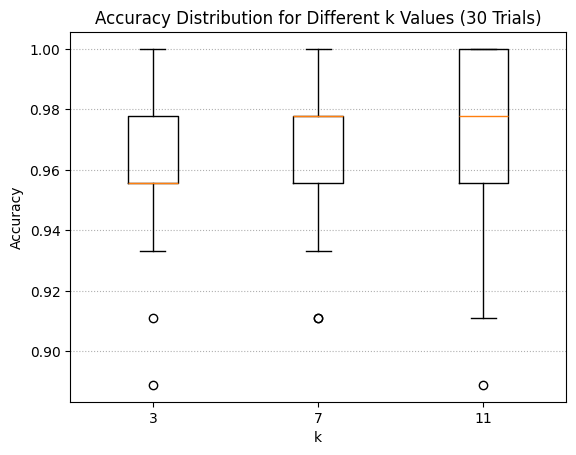

In [27]:
ks = [3, 7, 11]
n_trials = 30
results = {k: [] for k in ks}

for k in ks:
    for seed in range(n_trials):
        np.random.seed(seed)
        acc, _, _ = evaluate_knn(df, k)
        results[k].append(acc)

for k in ks:
    print(f"k={k}: mean={np.mean(results[k]):.3f}, std={np.std(results[k]):.3f}")

plt.boxplot([results[k] for k in ks], tick_labels=ks)
plt.title("Accuracy Distribution for Different k Values (30 Trials)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True, axis='y', linestyle=':')
plt.show()

📝 Cell 7 – Confusion Matrix for Each k
- This cell runs one representative trial for each k and prints its confusion matrix.
- The confusion matrix shows how well the classifier distinguishes between classes.



Confusion Matrix for k=3 (accuracy=0.956)
[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]


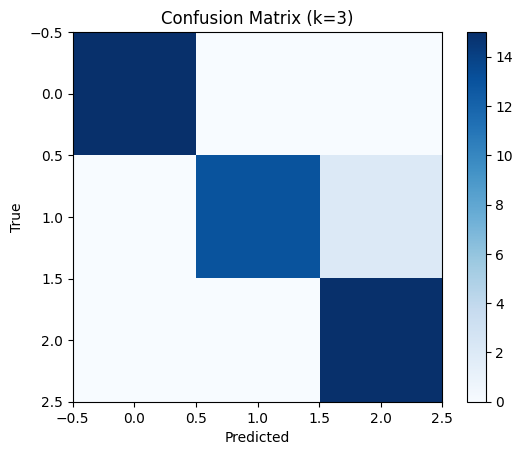


Confusion Matrix for k=7 (accuracy=1.000)
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


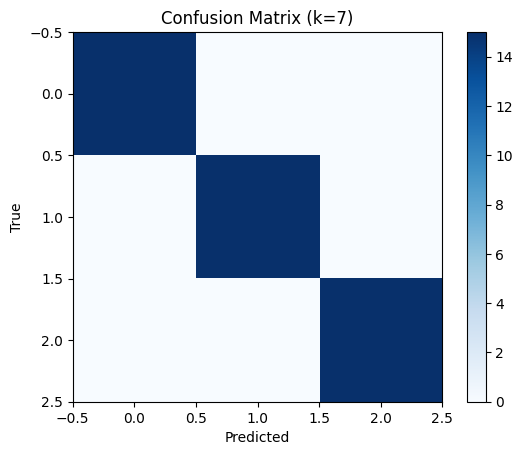


Confusion Matrix for k=11 (accuracy=0.978)
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


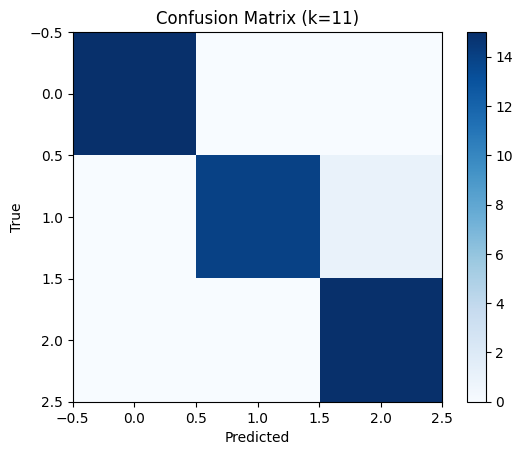

In [28]:
for k in ks:
    acc, y_true, y_pred = evaluate_knn(df, k)
    print(f"\nConfusion Matrix for k={k} (accuracy={acc:.3f})")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    plt.figure()
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.title(f"Confusion Matrix (k={k})")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


#### 🧩 Why Should k Be an Odd Number?

When the number of classes is even, using an **odd value of k** helps to **break ties** during majority voting.
If k were even (e.g., k = 4) and two neighbors belong to class A while two belong to class B,
the classifier would have no clear majority and would need a tie-breaking rule.
Choosing an odd k ensures that one class always receives more votes than the others,
resulting in a deterministic prediction.


### ✅ Discussion and Conclusions

#### 🧾 Summary of Results
- As *k* increases, the classifier becomes smoother (less variance) but may lose sensitivity to local patterns.
- Lower values of *k* (like 3) can achieve slightly higher accuracy but may be more affected by noise.
- The overall performance across 30 runs is consistent and high (> 0.9 accuracy for all tested *k* values).

#### 📊 Observations
- The boxplots confirm that different *k* values produce similar accuracy, with small variability.
- Confusion matrices show clear class separations for **Iris-setosa** and small confusion between **versicolor** and **virginica**.

#### 🔍 Conclusions
1. The k-NN algorithm is simple yet powerful for small, well-structured datasets like Iris.
2. Proper choice of *k* controls the trade-off between overfitting (low *k*) and underfitting (high *k*).
3. Repeated random splits provide a more reliable estimate of model performance.

#### 🚀 Future Improvements
- Apply feature scaling (normalization) to improve distance computation consistency.
- Use cross-validation instead of random splitting for more robust accuracy estimation.
- Extend the experiment to multi-dimensional datasets or higher values of *k* to study asymptotic behavior.

This exercise demonstrates the intuition behind **instance-based learning** and how the choice of neighborhood size affects classification performance.
